<b> The flow of the case study is as below:

* Reading the data in python
* Defining the problem statement
* Identifying the Target variable
* Looking at the distribution of Target variable
* Basic Data exploration
* Rejecting useless columns
* Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
* Feature Selection based on data distribution
* Outlier treatment
* Missing Values treatment
* Visual correlation analysis
* Statistical correlation analysis (Feature Selection)
* Converting data to numeric for ML
* Sampling and K-fold cross validation
* Trying multiple classification algorithms
* Selecting the best Model
* Deploying the best model in production

# Reading the data into python

<b> Data Description

* ID: Customer ID
* Age : Customer Age
* Experience : Customer Experience
* Income : Income of the Customer
* ZipCode: Customer's residence zipcode
* Family : No of Family members of the customer
* CCAvg: Credit Card Average Score
* Education: Education of the customer
* Mortgage: Mortgage taken or not taken by the customer
* Personal Loan: 0 = No personal loan given , 1 = personal loan given
* Securities Account : Having or not having a Securities Account
* CD Account : Having or not having a CD Account
* Online : Having or not having online banking
* Credit Card : Having or not having a credit card

In [1]:
#Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset
import pandas as pd
import numpy as np
BankLoanData=pd.read_csv('D:/IVY Institute/IVY_Python/Python Datasets/Kaggle project/bankloan.csv', encoding='latin')
print('Shape before deleting duplicate values:', BankLoanData.shape)

#Removing duplicate rows if any
BankLoanData=BankLoanData.drop_duplicates()
print('Shape after deleting duplicate values:', BankLoanData.shape)

#Printing sample data
#Start observing the Quantitative/Categorical/Qualitative variables
BankLoanData.head(10)

Shape before deleting duplicate values: (5000, 14)
Shape after deleting duplicate values: (5000, 14)


,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# Defining the problem statement

<b> Create a predictive model which can tell whether the bank should consider the application for loan approval or not?
     
* Target/Dependent Variable: Personal Loan
* Predictors: Age, Experience, Income, etc.
    
    
* Personal loan=0 Loan not apporoved
* Personal loan=1 Loan apporoved   


# Looking at the distribution of Target variable

<AxesSubplot:xlabel='Personal.Loan'>

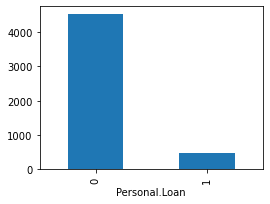

In [3]:
%matplotlib inline
#Creating Bar chart as the Target variable is Categoriacal
GroupedData=BankLoanData.groupby('Personal.Loan').size()
GroupedData.plot(kind='bar', figsize=(4,3))

The data distribution of Target variable is not satisfactory, we need to treat it. There are insufficient number of rows to learn from. We will be using SMOTE techinque.

# Target variable treatment - (SMOTE)

In [4]:
BankLoanData["Personal.Loan"].value_counts()

0    4520
1     480
Name: Personal.Loan, dtype: int64

In [5]:
!pip install imbalanced-learn

In [6]:
from imblearn.over_sampling import SMOTE

#Display the count of each class in the target column
#BankLoanData["Personal.Loan"]=BankLoanData["Personal.Loan"].map({0: 'N', 1: 'Y'})
#print(BankLoanData["Personal.Loan"].value_counts())


In [7]:
#Split the dataset into features (X) and Personal.Loan (Z)
X=BankLoanData.drop("Personal.Loan", axis=1)
Z=BankLoanData["Personal.Loan"]

In [8]:
#Split the data into training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, Z_train, Z_test = train_test_split(X, Z, test_size=0.2, random_state=11)

SMOTE over-sampling:
0    4520
1    4520
Name: Personal.Loan, dtype: int64


<AxesSubplot:xlabel='Personal.Loan'>

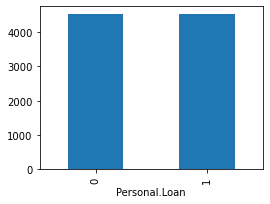

In [9]:
sm= SMOTE(random_state=42)
X_res, Z_res = sm.fit_resample(X,Z)

BankLoanData_smote_over = pd.concat([pd.DataFrame(X_res), pd.DataFrame(Z_res, columns=['Personal.Loan'])], axis=1)

print('SMOTE over-sampling:')
print(BankLoanData_smote_over["Personal.Loan"].value_counts())

GroupedData=BankLoanData_smote_over.groupby('Personal.Loan').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [10]:
print("Number of records added", BankLoanData_smote_over.shape[0]-BankLoanData.shape[0])


Number of records added 4040


In [11]:
BankLoanData_smote_over.head(10)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard,Personal.Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,0
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,0
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1


# Basic Data Exploration

In [12]:
#Observing the summarized information of data
#Data Types, missing values based on number of non-null values vs total rows, etc.
BankLoanData_smote_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9040 entries, 0 to 9039
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  9040 non-null   int64  
 1   Age                 9040 non-null   int64  
 2   Experience          9040 non-null   int64  
 3   Income              9040 non-null   int64  
 4   ZIP.Code            9040 non-null   int64  
 5   Family              9040 non-null   int64  
 6   CCAvg               9040 non-null   float64
 7   Education           9040 non-null   int64  
 8   Mortgage            9040 non-null   int64  
 9   Securities.Account  9040 non-null   int64  
 10  CD.Account          9040 non-null   int64  
 11  Online              9040 non-null   int64  
 12  CreditCard          9040 non-null   int64  
 13  Personal.Loan       9040 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 988.9 KB


In [13]:
#Looking at the descriptive statistics of data
BankLoanData_smote_over.describe(include='all')

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard,Personal.Loan
count,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.000000,9040.00000,9040.000000
mean,2459.289712,44.994027,19.771681,104.909624,93157.851438,2.327434,2.809416,1.891261,71.502544,0.063606,0.069801,0.491925,0.20531,0.500000
std,1417.874461,10.582397,10.576934,51.588189,1969.408992,1.052068,1.978239,0.765886,118.030218,0.244064,0.254825,0.499962,0.40395,0.500028
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1221.000000,36.000000,11.000000,59.000000,91942.000000,1.000000,1.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2425.500000,45.000000,20.000000,113.000000,93438.500000,2.000000,2.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.500000
75%,3686.250000,54.000000,28.000000,147.000000,94655.250000,3.000000,4.152914,2.000000,116.250000,0.000000,0.000000,1.000000,0.00000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [14]:
#Finding unique values for each column
#To understand which column is continuous and which one is categorical
#Typically if the number of unique values are <20 then the variables is likely to be Category otherwise Continuous
BankLoanData_smote_over.nunique()

ID                    5000
Age                     45
Experience              47
Income                 189
ZIP.Code              2310
Family                   4
CCAvg                 4105
Education                3
Mortgage               519
Securities.Account       2
CD.Account               2
Online                   2
CreditCard               2
Personal.Loan            2
dtype: int64

ID is row number and ZIP.Code is qulitative-> can drop


Family, Education, Securitis.Account, CD.Account, Online, CreditCard, Personal.Loan -> Categorical Variables


Age, Experience, Income, CCAvg, Mortgage -> Continuous Variables

# Removing useless columns from the data

In [15]:
#Deleting those columns which are not useful in predictive analysis
UselessCol=['ID', 'ZIP.Code']
BankLoanData_smote_over=BankLoanData_smote_over.drop(UselessCol, axis=1)
BankLoanData_smote_over.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard,Personal.Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0
5,37,13,29,4,0.4,2,155,0,0,1,0,0
6,53,27,72,2,1.5,2,0,0,0,1,0,0
7,50,24,22,1,0.3,3,0,0,0,0,1,0
8,35,10,81,3,0.6,2,104,0,0,1,0,0
9,34,9,180,1,8.9,3,0,0,0,0,0,1


# Visual Exploratory Data Analysis

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots

In [16]:
#Plotting multiple bar charts at once for Categorical variables
#Since there is no default function which can plot bar charts for multiple columns at once
#We are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    #Generating multiple subplots
    fig,subPlot=plt.subplots(nrows=1,ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of:'+ str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

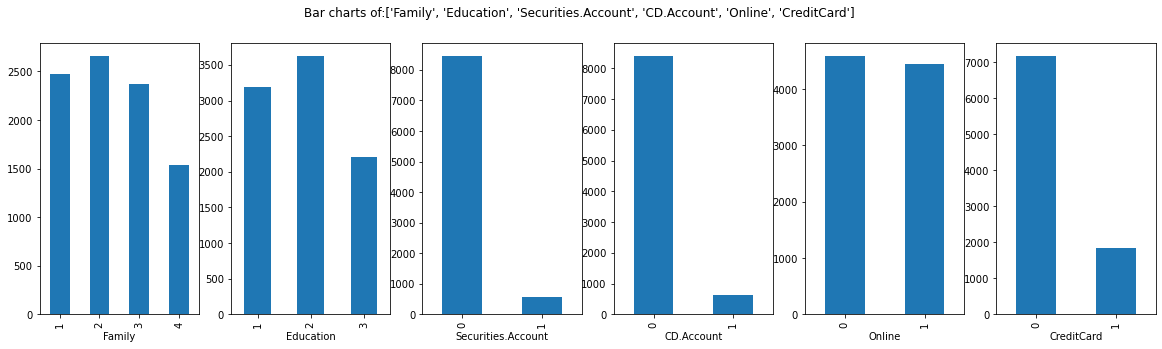

In [17]:
#Callinng the function
PlotBarCharts(inpData=BankLoanData_smote_over, 
              colsToPlot=['Family','Education','Securities.Account','CD.Account', 'Online', 'CreditCard'])

### Visualize distribution of all the Continuous Predictor variables in the data using histogram

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'CCAvg'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>, <AxesSubplot:>]],
      dtype=object)

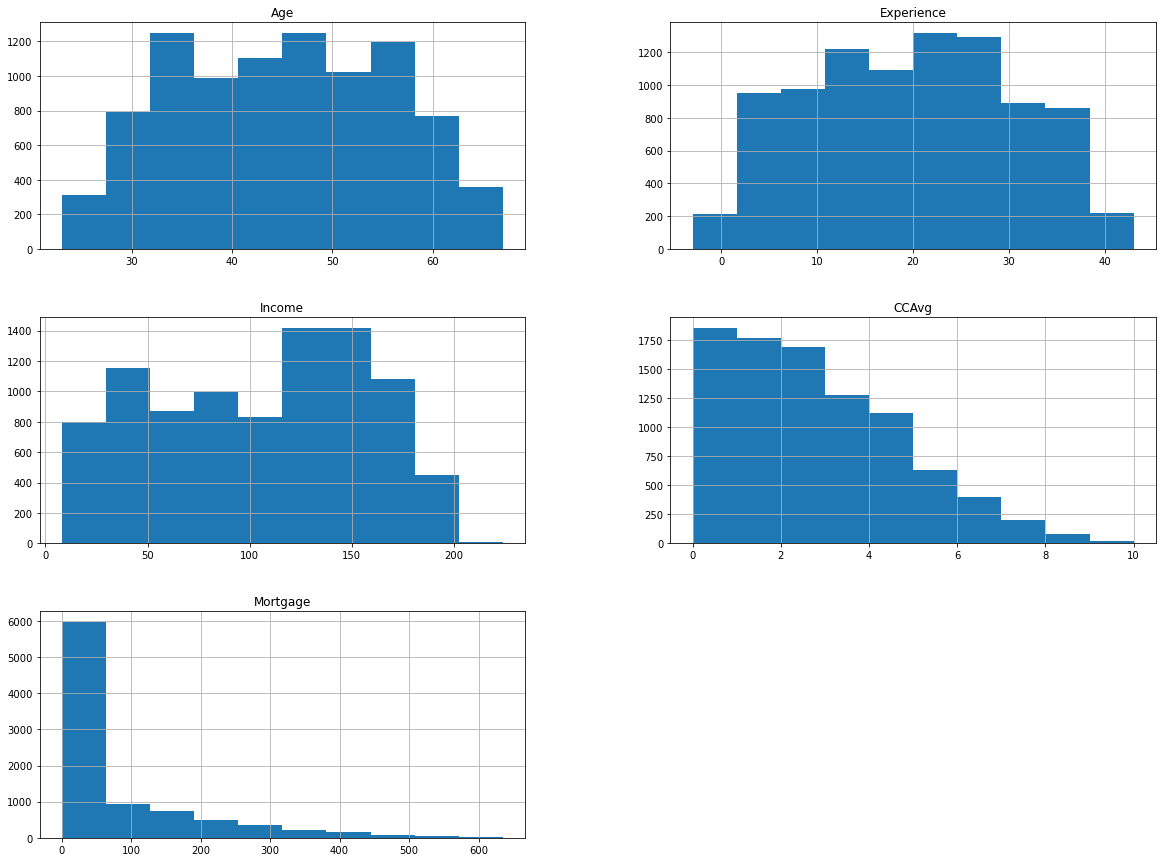

In [18]:
#Plotting histograms of multiple columns together
#Observe that there is some outliers,
BankLoanData_smote_over.hist(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], figsize=(20,15))

#### Outlier Treatment

In [19]:
#Finding nearest value to 400 mark in Mortgage
BankLoanData_smote_over['Mortgage'][BankLoanData_smote_over['Mortgage']<=400].sort_values(ascending=False)

2422    400
3919    400
4698    400
6099    400
8541    399
       ... 
4665      0
4664      0
1773      0
4662      0
0         0
Name: Mortgage, Length: 8781, dtype: int64

In [20]:
#Replacing outliers with nearest possible values
BankLoanData_smote_over['Mortgage'][BankLoanData_smote_over['Mortgage']>400]=400

array([[<AxesSubplot:title={'center':'Mortgage'}>]], dtype=object)

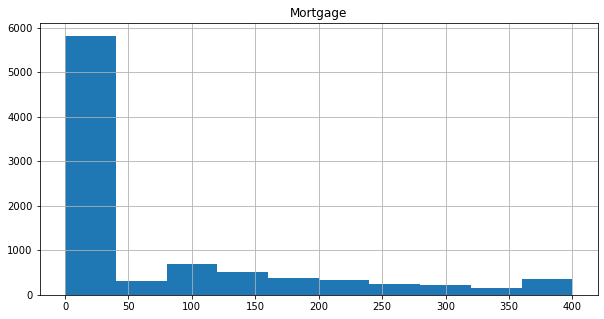

In [21]:
#Visualising distribution after outlier treatment
BankLoanData_smote_over.hist(['Mortgage'], figsize=(10,5))

# Visual Rpresentation after outlier treatment

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'CCAvg'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>, <AxesSubplot:>]],
      dtype=object)

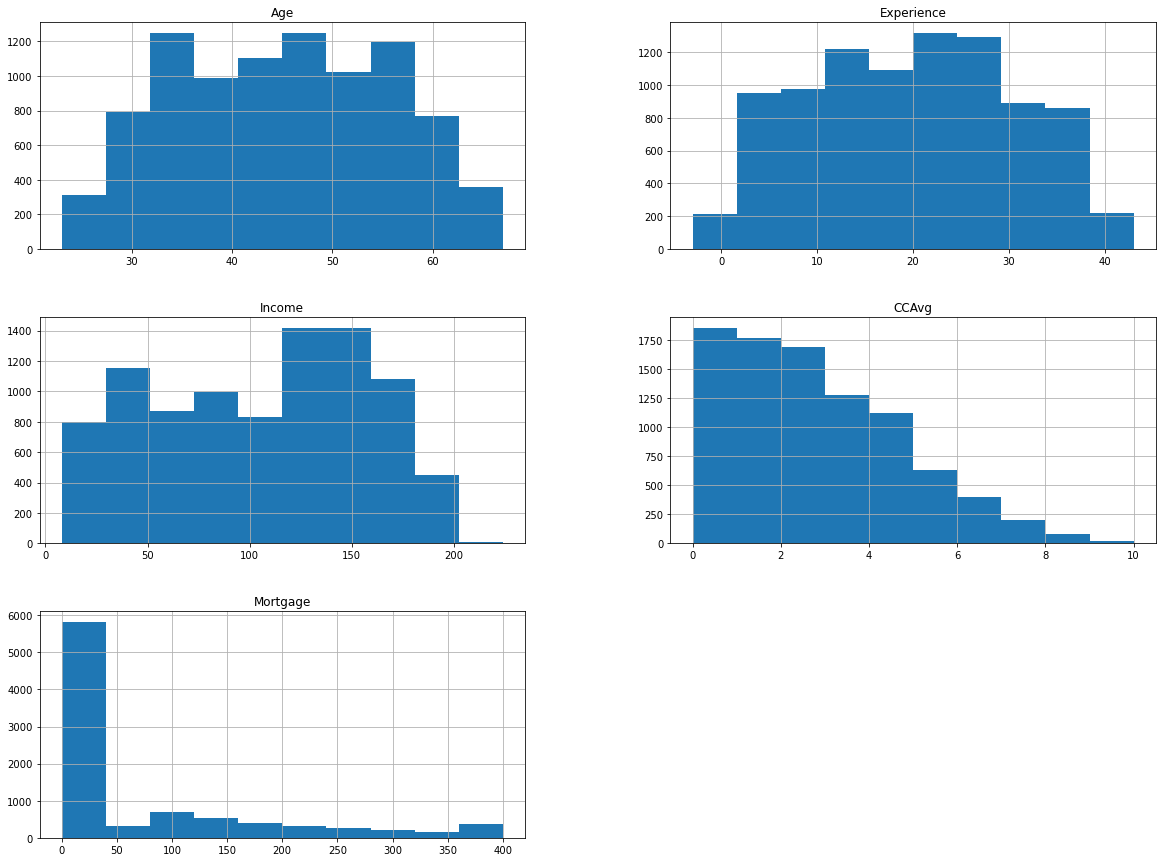

In [22]:
BankLoanData_smote_over.hist(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], figsize=(20,15))

# Missing value treatment

In [23]:
#finding how many missing values for each column
BankLoanData_smote_over.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
Personal.Loan         0
dtype: int64

No columns has missing values

# Feature Selection

# Relationship exploration: Categorical Vs Continuous -- Box Plots

When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

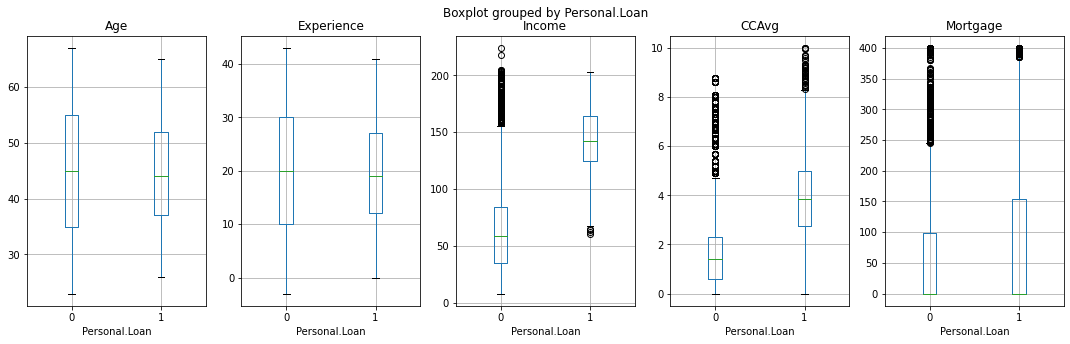

In [24]:
#Box plots for Categorical Target Variable "Personal.Loan" and Continuous predictor
ContinuousColsList=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1,ncols=len(ContinuousColsList), figsize=(18,5))

#Creating box plots for each Continuous preedictor against Target Variable "Personal.Loan"
for PredictorCol, i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    BankLoanData_smote_over.boxplot(column=PredictorCol, by='Personal.Loan',
                                   figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [25]:
#Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPreditorList):
    from scipy.stats import f_oneway
    
    #Creating empty list of final selected predictors
    SelectedPreditors=[]
    print("################################### ANOVA Results ################################### \n")
    
    for predictor in ContinuousPreditorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults=f_oneway(*CategoryGroupLists)
        
        #If ANOVA P-Value is <0.05, that means we reject H0
        if(AnovaResults[1]<0.05):
            print(predictor, 'is correlated with', TargetVariable, '|P-Value', AnovaResults[1])
            SelectedPreditors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '|P-Value', AnovaResults[1])
            
    return(SelectedPreditors)

In [26]:
#Calling the function to check which continous variable correlated with target
ContinuousVariables=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
FunctionAnova(inpData=BankLoanData_smote_over, TargetVariable='Personal.Loan', ContinuousPreditorList=ContinuousVariables)

################################### ANOVA Results ################################### 

Age is correlated with Personal.Loan |P-Value 0.0007962380338097193
Experience is correlated with Personal.Loan |P-Value 0.0011853604974651187
Income is correlated with Personal.Loan |P-Value 0.0
CCAvg is correlated with Personal.Loan |P-Value 0.0
Mortgage is correlated with Personal.Loan |P-Value 1.2769895295258067e-55


['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

 # Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
 
 When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

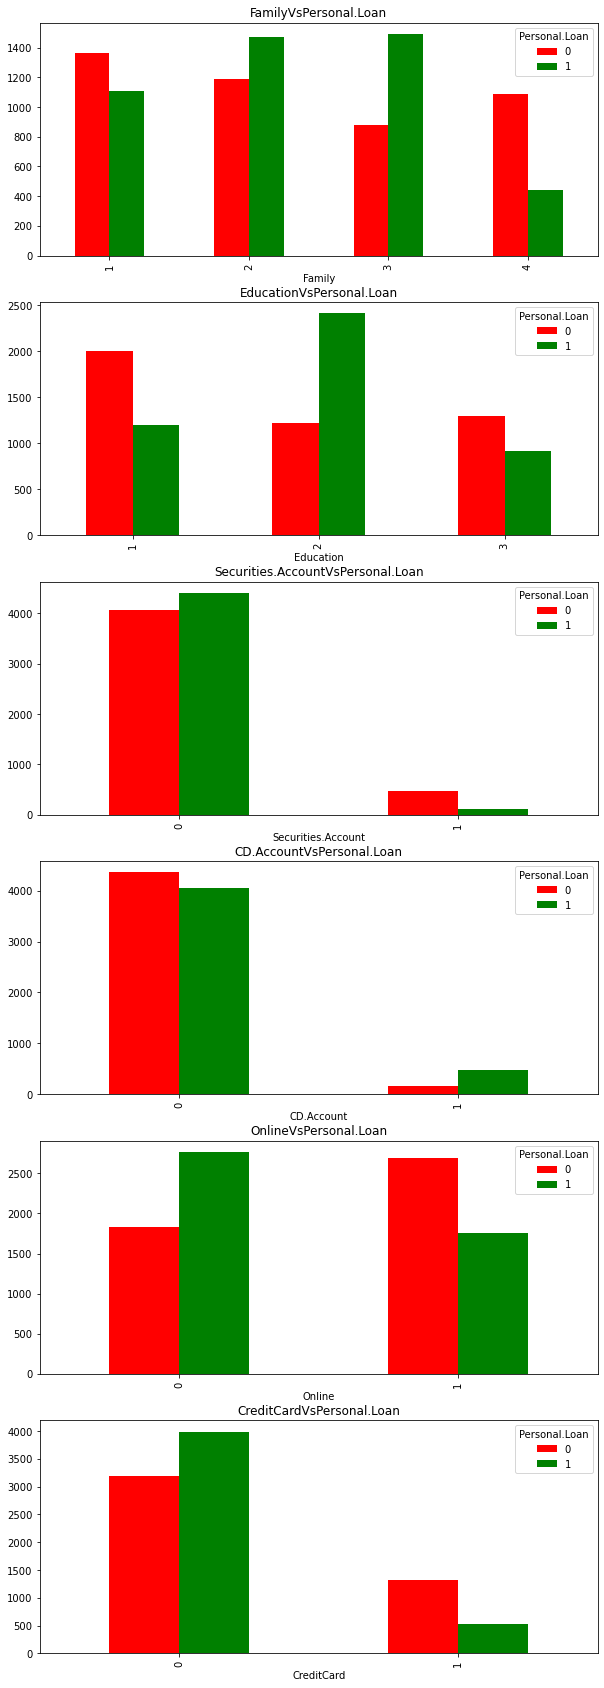

In [27]:
#Visual Inference using Grouped Bar charts
CategoricalColsList=['Family','Education','Securities.Account','CD.Account', 'Online', 'CreditCard']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

#Creating Grouped bar plots for each categorical predictor against the target variable 'Personal.Loan'
for CategoricalCol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResults=pd.crosstab(index=BankLoanData_smote_over[CategoricalCol], columns=BankLoanData_smote_over['Personal.Loan'])
    
    CrossTabResults.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+'Vs'+'Personal.Loan')

# Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

In [28]:
#Writing a function to find the correlation of all categorical variables with Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    #Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    for predictor in CategoricalVariablesList:
        CrossTabResults=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult=chi2_contingency(CrossTabResults)
        
        #If the ChiSq P-Value is <0.05, that means we reject Ho
        if(ChiSqResult[1]<0.05):
            print(predictor, 'is correlated with', TargetVariable,'|P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlatedd with', TargetVariable,'|P-Value', ChiSqResult[1])
    return(SelectedPredictors)

In [29]:
CategoricalVariables=['Family','Education','Securities.Account','CD.Account', 'Online', 'CreditCard']
#Calling the functions
FunctionChisq(inpData=BankLoanData_smote_over, TargetVariable='Personal.Loan', CategoricalVariablesList=CategoricalVariables)

Family is correlated with Personal.Loan |P-Value: 2.5371395670418906e-105
Education is correlated with Personal.Loan |P-Value: 6.05348070713575e-144
Securities.Account is correlated with Personal.Loan |P-Value: 7.634889829717296e-51
CD.Account is correlated with Personal.Loan |P-Value: 1.4345751659378431e-36
Online is correlated with Personal.Loan |P-Value: 1.1108392147787683e-86
CreditCard is correlated with Personal.Loan |P-Value: 1.1638371624469815e-95


['Family',
 'Education',
 'Securities.Account',
 'CD.Account',
 'Online',
 'CreditCard']

# Selecting final predictors for Machine Learning

In [30]:
SelectedColumns=['Family', 'Education', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard',
                 'Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
#Selecting Final columns
DataForML=BankLoanData_smote_over[SelectedColumns]
DataForML.head()

,Family,Education,Securities.Account,CD.Account,Online,CreditCard,Age,Experience,Income,CCAvg,Mortgage
0,4,1,1,0,0,0,25,1,49,1.6,0
1,3,1,1,0,0,0,45,19,34,1.5,0
2,1,1,0,0,0,0,39,15,11,1.0,0
3,1,2,0,0,0,0,35,9,100,2.7,0
4,4,2,0,0,0,1,35,8,45,1.0,0


In [31]:
#Saving the final data for refence during deployment
DataForML.to_pickle('DataForML.pkl')

# Machine Learning: Splitting the data into Training and Testing sample

In [32]:
#Adding Target Variable to the data
DataForML['Personal.Loan']=BankLoanData_smote_over['Personal.Loan']
#Printing Sample rows
DataForML.head()


,Family,Education,Securities.Account,CD.Account,Online,CreditCard,Age,Experience,Income,CCAvg,Mortgage,Personal.Loan
0,4,1,1,0,0,0,25,1,49,1.6,0,0
1,3,1,1,0,0,0,45,19,34,1.5,0,0
2,1,1,0,0,0,0,39,15,11,1.0,0,0
3,1,2,0,0,0,0,35,9,100,2.7,0,0
4,4,2,0,0,0,1,35,8,45,1.0,0,0


In [33]:
#Printing all the column names into Training and Testing Sample
DataForML.columns

Index(['Family', 'Education', 'Securities.Account', 'CD.Account', 'Online',
       'CreditCard', 'Age', 'Experience', 'Income', 'CCAvg', 'Mortgage',
       'Personal.Loan'],
      dtype='object')

In [34]:
#Separate Target Variable and Predictor Variables
TargetVariable='Personal.Loan'

Predictors=['Family', 'Education', 'Securities.Account', 'CD.Account', 'Online',
            'CreditCard', 'Age', 'Experience', 'Income', 'CCAvg', 'Mortgage',]

X=DataForML[Predictors].values
Y=DataForML[TargetVariable].values

#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

In [35]:
X[0:4]

array([[  4. ,   1. ,   1. ,   0. ,   0. ,   0. ,  25. ,   1. ,  49. ,
          1.6,   0. ],
       [  3. ,   1. ,   1. ,   0. ,   0. ,   0. ,  45. ,  19. ,  34. ,
          1.5,   0. ],
       [  1. ,   1. ,   0. ,   0. ,   0. ,   0. ,  39. ,  15. ,  11. ,
          1. ,   0. ],
       [  1. ,   2. ,   0. ,   0. ,   0. ,   0. ,  35. ,   9. , 100. ,
          2.7,   0. ]])

# Standardization/Normalization of data

In [36]:
#Standardization of Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#choose either standardization or Normalization
#On this data Min Max Nomalization produced better result

#Choose between standarization and MinMax normalization
PredictorScaler=StandardScaler()
#PredictorScaler=MinMaxScaler()

#Storing the fit object for letter reference
PredictorScalerFit=PredictorScaler.fit(X)

#Generating the standardization values of X
X=PredictorScalerFit.transform(X)

#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

In [37]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6328, 11)
(6328,)
(2712, 11)
(2712,)


In [38]:
X[0:4]

array([[ 1.58987671e+00, -1.16376367e+00,  3.83689186e+00,
        -2.73931833e-01, -9.83977895e-01, -5.08283280e-01,
        -1.88947098e+00, -1.77487352e+00, -1.08382787e+00,
        -6.11393620e-01, -6.24560938e-01],
       [ 6.39315502e-01, -1.16376367e+00,  3.83689186e+00,
        -2.73931833e-01, -9.83977895e-01, -5.08283280e-01,
         5.64501749e-04, -7.29629318e-02, -1.37460818e+00,
        -6.61946415e-01, -6.24560938e-01],
       [-1.26180691e+00, -1.16376367e+00, -2.60627622e-01,
        -2.73931833e-01, -9.83977895e-01, -5.08283280e-01,
        -5.66446144e-01, -4.51165285e-01, -1.82047133e+00,
        -9.14710388e-01, -6.24560938e-01],
       [-1.26180691e+00,  1.41985813e-01, -2.60627622e-01,
        -2.73931833e-01, -9.83977895e-01, -5.08283280e-01,
        -9.44453241e-01, -1.01846881e+00, -9.51747987e-02,
        -5.53128786e-02, -6.24560938e-01]])

In [39]:
# Inverse transform will bring back the original scale
print(PredictorScalerFit.inverse_transform(X)[0:4])

[[  4.    1.    1.    0.    0.    0.   25.    1.   49.    1.6   0. ]
 [  3.    1.    1.    0.    0.    0.   45.   19.   34.    1.5   0. ]
 [  1.    1.    0.    0.    0.    0.   39.   15.   11.    1.    0. ]
 [  1.    2.    0.    0.    0.    0.   35.    9.  100.    2.7   0. ]]


# Logistic Regression with Hyperparameter (GridSearchCV)

In [40]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression()

In [57]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

#Parameters to try
#'C': [1,2,3,4,5,6,7,8,9,10]
#'penalty' : ['l1', 'l2', 'elasticnet', None]
#'Solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
Parameter_Trials1={'C' : [1,2,3,4,5,6,7,8,9,10],
                  'penalty' : ['l1', 'l2', 'elasticnet', 'None'],
                  'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
                 }

Grid_Search1=GridSearchCV(logModel, param_grid=Parameter_Trials1, cv=5, n_jobs=-1)

In [58]:
GridSearchResults1=Grid_Search1.fit(X,Y)

In [59]:
#Fetching the best parameter
print(GridSearchResults1.best_params_)

{'C': 4, 'penalty': 'l2', 'solver': 'newton-cg'}


# Logistic Regression

In [44]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#choose parameter Penalty='l1' or C=1
#choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' 
clf=LogisticRegression(C=4, penalty='l1', solver='liblinear')

#Printing all the parameters of logistic regression
#print(clf)

#Creating the model on Training Data
LOG=clf.fit(X_train, Y_train)
prediction=LOG.predict(X_test)

#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

#Printing the overall accuracy of the model
F1_Score=metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

#Importing cross validation funnction from sklearn
from sklearn.model_selection import cross_val_score

#Running 10-fold cross validation on a given algorithm
#Passing full data X and Y because the K-fold will split the data and automatically choose train/test
Accuracy_Values= cross_val_score(LOG, X, Y, cv=10, scoring='f1_weighted')
print('\n Accuracy values for 10-fold cross valiation: \n', Accuracy_Values)
print('\n Final Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1337
           1       0.89      0.91      0.90      1375

    accuracy                           0.90      2712
   macro avg       0.90      0.90      0.90      2712
weighted avg       0.90      0.90      0.90      2712

[[1186  151]
 [ 118 1257]]
Accuracy of the model on Testing Sample Data: 0.9

 Accuracy values for 10-fold cross valiation: 
 [0.88163355 0.90375529 0.89933517 0.89710261 0.90596413 0.89591785
 0.9148204  0.89600497 0.90483745 0.90375152]

 Final Average Accuracy of the model: 0.9


# Decision Trees

In [55]:
#Decision Trees and twining Hyperparameters
from sklearn import tree
#choose from differnt tunable hyper parameter
DTclf=tree.DecisionTreeClassifier()

#GridSearchCV
from sklearn.model_selection import GridSearchCV

#Parameters to try
#'max_depth' : [2,3,4,5]
#'criterion' : ['entropy', 'gini']
Parameter_Trials2={'max_depth' : [2,3,4,5],
                   'criterion' : ['entropy', 'gini']}

Grid_Search2 = GridSearchCV(DTclf, param_grid=Parameter_Trials2, cv=5, n_jobs=-1)

GridSearchResults2 = Grid_Search2.fit(X,Y)

#Fetching the best parameter
print(GridSearchResults2.best_params_)

{'criterion': 'gini', 'max_depth': 4}


DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1337
           1       0.98      0.88      0.93      1375

    accuracy                           0.93      2712
   macro avg       0.94      0.93      0.93      2712
weighted avg       0.94      0.93      0.93      2712

[[1315   22]
 [ 164 1211]]
Accuracy of the model on Testing Sample Data : 0.93

 Accuracy values for 10-fold Cross Validation: 
 [0.96347587 0.93907811 0.92346569 0.94013627 0.94350879 0.92903542
 0.91911228 0.92450939 0.92226808 0.94241446]

 Final Accuracy of the model: 0.93


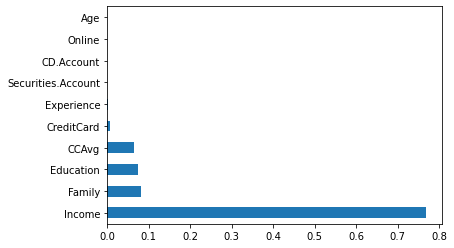

In [56]:
#Decision Trees
from sklearn import tree
#choose from differnt tunable hyper parameter
clf=tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

#Printing all the parameters of Decision Trees
print(clf)

#Creating the model on Training Data
DTree=clf.fit(X_train, Y_train)
prediction=DTree.predict(X_test)

#Measuring the accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

#Printing the overall accuracy of the model
F1_Score= metrics.f1_score(Y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data :',round(F1_Score,2))

#Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances=pd.Series(DTree.feature_importances_,index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

#Running 10-Fold Cross Validation on a given algorithm
#Passing full data X and Y  because the K-fold will split the data and automatically choose train and test
Accuracy_Values=cross_val_score(DTree, X, Y, cv=10, scoring='f1_weighted')
print('\n Accuracy values for 10-fold Cross Validation: \n', Accuracy_Values)
print('\n Final Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting a Decision Tree

In [47]:
#Tnstalling the required library for plotting the decision tree
!pip install dtreeplt

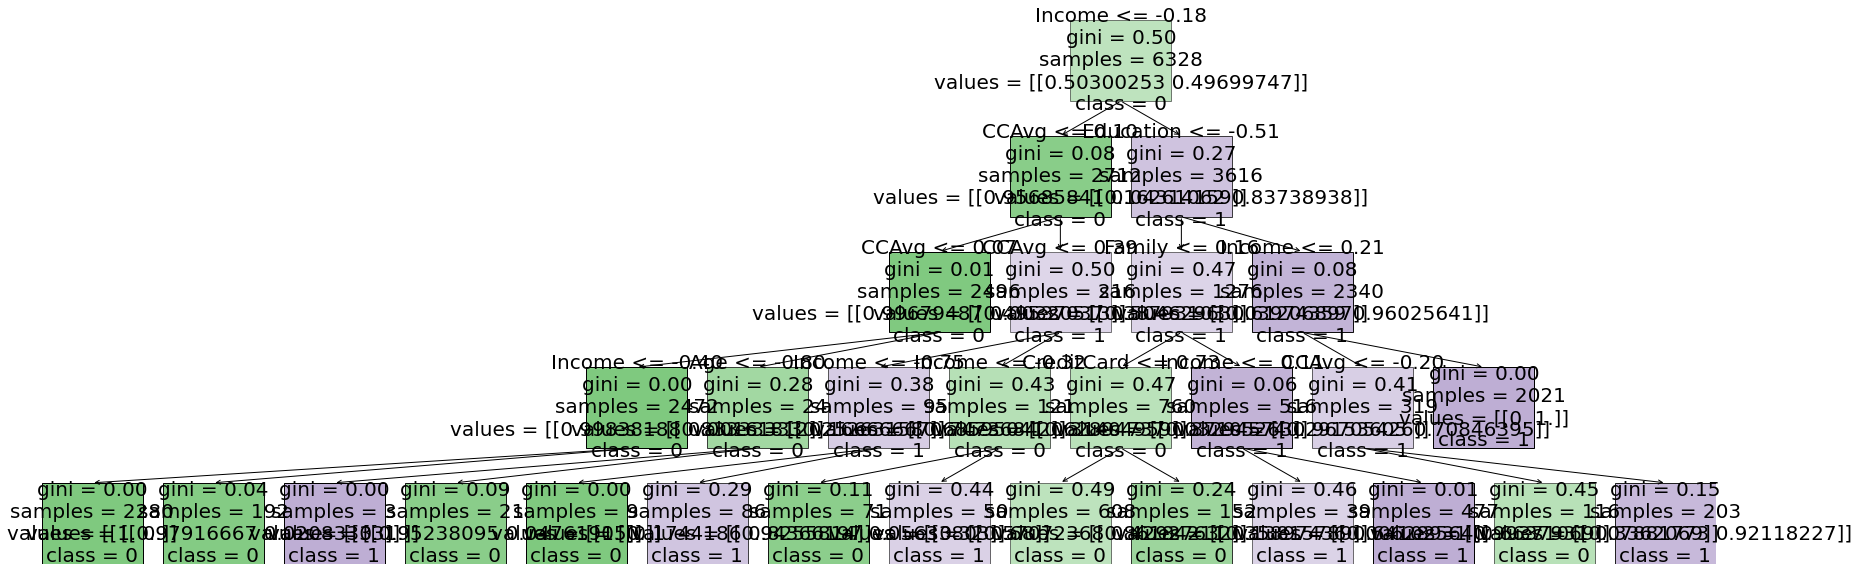

In [48]:
from dtreeplt import dtreeplt
import matplotlib.pyplot as plt
dtree=dtreeplt(model=clf, feature_names=Predictors, target_names=['0','1'])
fig=dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(30,10)

# Random Forest

In [68]:
#Random Forest and twining Hyperparameters
from sklearn.ensemble import RandomForestClassifier
#choose from differnt tunable hyper parameter
RFclf=RandomForestClassifier(random_state=101)

#GridSearchCV
from sklearn.model_selection import GridSearchCV

#Parameters to try
#'n_estimators' : [50,100,110,120]
#'max_depth' : [2,3,4,5]
#'criterion' : ['entropy', 'gini']
Parameter_Trials3={'n_estimators' : [50,100,110,120], 
                   'max_depth' : ['None',2,3,4,5],
                   'criterion' : ['entropy', 'gini']}

Grid_Search3 = GridSearchCV(RFclf, param_grid=Parameter_Trials3, cv=5, n_jobs=1)

GridSearchResults3 = Grid_Search3.fit(X_train,Y_train)

#Fetching the best parameter
print(GridSearchResults3.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 110}


RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=110)
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1337
           1       0.92      0.99      0.95      1375

    accuracy                           0.95      2712
   macro avg       0.95      0.95      0.95      2712
weighted avg       0.95      0.95      0.95      2712

[[1227  110]
 [  20 1355]]


,Family,Education,Securities.Account,CD.Account,Online,CreditCard,Age,Experience,Income,CCAvg,Mortgage,TargetColumn,Prediction
0,1.589877,0.141986,-0.260628,3.650543,1.016283,1.967407,0.378572,0.399790,-1.452150,-1.218027,0.785985,0,0
1,-0.311246,1.447735,-0.260628,-0.273932,1.016283,1.967407,1.229088,1.156195,-0.618579,-0.257524,1.387938,0,0
2,-0.311246,0.141986,-0.260628,-0.273932,-0.983978,-0.508283,1.512593,1.534397,1.184259,-0.120422,-0.624561,1,1
3,0.639316,0.141986,-0.260628,-0.273932,1.016283,-0.508283,0.284070,0.210689,1.164873,0.538708,-0.624561,1,1
4,-1.261807,-1.163764,-0.260628,-0.273932,-0.983978,-0.508283,0.662077,0.683442,-0.424726,0.428728,-0.067530,1,0


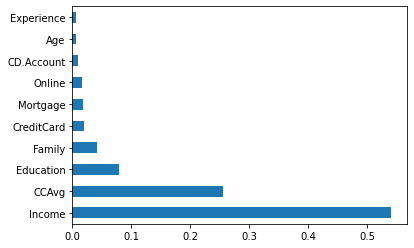

In [67]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=110, max_depth=5, criterion='entropy')

#Printing all the parameters of Random forest
print(clf)

#Creating the model on Training Data
RF = clf.fit(X_train, Y_train)
prediction=RF.predict(X_test)

#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

#Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=Y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1337
           1       0.98      0.97      0.97      1375

    accuracy                           0.97      2712
   macro avg       0.97      0.97      0.97      2712
weighted avg       0.97      0.97      0.97      2712

[[1306   31]
 [  38 1337]]


,Family,Education,Securities.Account,CD.Account,Online,CreditCard,Age,Experience,Income,CCAvg,Mortgage,TargetColumn,Prediction
0,1.589877,0.141986,-0.260628,3.650543,1.016283,1.967407,0.378572,0.399790,-1.452150,-1.218027,0.785985,0,0
1,-0.311246,1.447735,-0.260628,-0.273932,1.016283,1.967407,1.229088,1.156195,-0.618579,-0.257524,1.387938,0,0
2,-0.311246,0.141986,-0.260628,-0.273932,-0.983978,-0.508283,1.512593,1.534397,1.184259,-0.120422,-0.624561,1,1
3,0.639316,0.141986,-0.260628,-0.273932,1.016283,-0.508283,0.284070,0.210689,1.164873,0.538708,-0.624561,1,1
4,-1.261807,-1.163764,-0.260628,-0.273932,-0.983978,-0.508283,0.662077,0.683442,-0.424726,0.428728,-0.067530,1,1


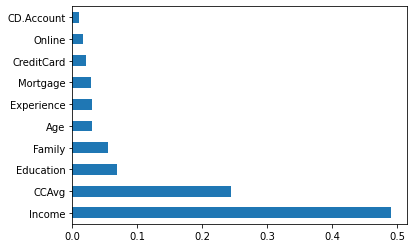

In [51]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, criterion='gini')

#Printing all the parameters of Random forest
print(clf)

#Creating the model on Training Data
RF = clf.fit(X_train, Y_train)
prediction=RF.predict(X_test)

#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

#Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=Y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

# AdaBoost

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1)
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1337
           1       0.94      0.95      0.95      1375

    accuracy                           0.95      2712
   macro avg       0.95      0.94      0.95      2712
weighted avg       0.95      0.95      0.95      2712

[[1251   86]
 [  63 1312]]


,Family,Education,Securities.Account,CD.Account,Online,CreditCard,Age,Experience,Income,CCAvg,Mortgage,TargetColumn,Prediction
0,1.589877,0.141986,-0.260628,3.650543,1.016283,1.967407,0.378572,0.399790,-1.452150,-1.218027,0.785985,0,0
1,-0.311246,1.447735,-0.260628,-0.273932,1.016283,1.967407,1.229088,1.156195,-0.618579,-0.257524,1.387938,0,0
2,-0.311246,0.141986,-0.260628,-0.273932,-0.983978,-0.508283,1.512593,1.534397,1.184259,-0.120422,-0.624561,1,1
3,0.639316,0.141986,-0.260628,-0.273932,1.016283,-0.508283,0.284070,0.210689,1.164873,0.538708,-0.624561,1,1
4,-1.261807,-1.163764,-0.260628,-0.273932,-0.983978,-0.508283,0.662077,0.683442,-0.424726,0.428728,-0.067530,1,0


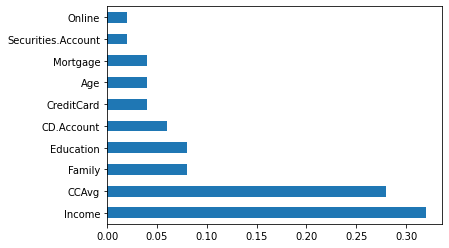

In [52]:
#AdaBoost Regression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Choosing Decision Tree with 1 level as the weak learner 
DTC = DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=50, estimator=DTC ,learning_rate=1)

#Printing all the parameters of AdaBoost
print(clf)

#Creating the model on Training Data
AB = clf.fit(X_train, Y_train)
prediction=AB.predict(X_test)

#Measuring accuracy of Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))

#Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=Y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

# XGBoost

In [53]:
#pip install xgboost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1337
           1       0.98      0.97      0.98      1375

    accuracy                           0.98      2712
   macro avg       0.98  

,Family,Education,Securities.Account,CD.Account,Online,CreditCard,Age,Experience,Income,CCAvg,Mortgage,TargetColumn,Prediction
0,1.589877,0.141986,-0.260628,3.650543,1.016283,1.967407,0.378572,0.399790,-1.452150,-1.218027,0.785985,0,0
1,-0.311246,1.447735,-0.260628,-0.273932,1.016283,1.967407,1.229088,1.156195,-0.618579,-0.257524,1.387938,0,0
2,-0.311246,0.141986,-0.260628,-0.273932,-0.983978,-0.508283,1.512593,1.534397,1.184259,-0.120422,-0.624561,1,1
3,0.639316,0.141986,-0.260628,-0.273932,1.016283,-0.508283,0.284070,0.210689,1.164873,0.538708,-0.624561,1,1
4,-1.261807,-1.163764,-0.260628,-0.273932,-0.983978,-0.508283,0.662077,0.683442,-0.424726,0.428728,-0.067530,1,1


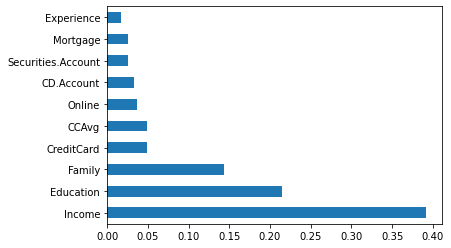

In [54]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')
 
#Printing all the parameters of XGBoost
print(clf)
 
#Creating the model on Training Data
XGB=clf.fit(X_train,Y_train)
prediction=XGB.predict(X_test)
 
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(Y_test, prediction))
print(metrics.confusion_matrix(Y_test, prediction))
 
#Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
 
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=Y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()